# Logistic Regression Classification with SciKit-Learn

***Summary***
- Scikit-Learn Features
- Multiclass Logistic Regression (Iris Dataset)

***Table of Contents:*** 
- [SciKit-Learn Overview](#scikit-learn)
- [Understanding the Data](#understanding-data)
- [Building the Logistic Regression Model](#build-model)
- [Visualizing the Results](#visualizing-results)
- [Scaling Data Features](#scaling)


**Author List**: Chad Wakamiya (Summer 2020); Sana Iqbal (Fall 2017); Kevin Li, Ikhlaq Sidhu (Spring 2017) <br>
**Original Sources**: http://scikit-learn.org,http://archive.ics.uci.edu/ml/datasets/Iris <br>
**License**: Feel free to do whatever you want to with this code <br>

***
<a id='scikit-learn'></a>
## Scikit-learn Overview

SciKit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. The library is focused on modeling data. It is not focused on loading, manipulating and summarizing data. SciKit methods include:
- [Regression](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- [Classification](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- [Clustering](https://scikit-learn.org/stable/modules/clustering.html#clustering)
- [Dimensionality Reduction](https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
- [Model Selection](https://scikit-learn.org/stable/model_selection.html#model-selection)
- [Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)

### Machine Learing Model Steps

**1. Understand the data:** Create graphs, visualize feature distributions, look for missing values, check for categorical or numerical features.

**2. Data preprocessing:** Clean and prepare data for model ingestion.
- Impute missing values, normalize/scale data features
- Create categorical variables

**3. Building the model:** Build using appropriate algorithms. Fit models with training data using scikit-learn library. Calculate training error to understand the bias in your model.
- Divide the dataset into training and validation subsets
- Fit popular models (random forecasts, SVM, regression, nearest neighbors, clustering etc.)

**4. Testing and iteration:** Having testing outcomes and improve through each iteration. Test model prediction accuracy using validation data. This gives you bias and variance error in the model.
- Scoring models by calculating accuracy and other performance metrics


***
# Iris Classification Example

**Problem**: 'Iris 'setosa' species has medicinal benefits and we want to make the process of identifying an iris species scalable'. Using sepal length and width measurements predict the iris species.

<img src="assets/iris.png" width="800"/>
<center> <a href="http://suruchifialoke.com/2016-10-13-machine-learning-tutorial-iris-classification/">Image by Suruchi Fialoke </a>

<a id='understanding-data'></a>
## I. Understanding the data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('iris_classification.csv')

# lets us look at the data
data.head(5)

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


### i. How many observations for each label?

In [3]:
data['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [4]:
from sklearn.utils import shuffle

# SHUFFLE data instances to randomize the distribution of different classes
data = shuffle(data).reset_index(drop=True)

### ii. Check for NaN values

In [5]:
# Check if data has any NAN  values, you can choose to drop NAN
#containing rows or replace NAN  values with mean. median,or any assumed value.

print('Number of NaNs in the dataframe:\n',data.isnull().sum())

Number of NaNs in the dataframe:
 sepal_length    0
sepal_width     0
species         0
dtype: int64


### iii. Split into X and Y vectors

In [6]:
# Our functions take in features and labels as arrays  so we need to separate them 

# GET FEATURES X FROM THE DATA
X = data.iloc[:,:-1]
X.head()

,sepal_length,sepal_width
0,7.4,2.8
1,7.7,3.8
2,4.6,3.6
3,5.2,4.1
4,7.7,2.6


In [7]:
# GET LABELS Y FROM THE DATA
Y = data['species']
Y.head()

0    virginica
1    virginica
2       setosa
3       setosa
4    virginica
Name: species, dtype: object

In [8]:
# should do sanity check on data often
print("Feature vector shape =", X.shape)
print("Class shape =", Y.shape)


Feature vector shape = (150, 2)
Class shape = (150,)


### iv. Map class labels to integers

In [9]:
Y = Y.map({'versicolor': 0, 'virginica': 1,'setosa' :2})

print("Our new Y vector is:")
Y.head()

Our new Y vector is:


0    1
1    1
2    2
3    2
4    1
Name: species, dtype: int64

### iv. Visualize feature distributions

In [10]:
# More summary about our data
data.describe()

,sepal_length,sepal_width
count,150.000000,150.000000
mean,5.843333,3.054000
std,0.828066,0.433594
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


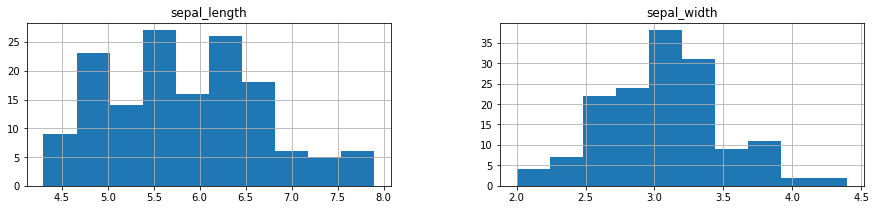

In [11]:
# Get feature distribution of each continuous valued feature (sepal_length and sepal_width)
data.hist(figsize=(15,3))
plt.show()

            sepal_length  sepal_width
species                              
setosa                50           50
versicolor            50           50
virginica             50           50


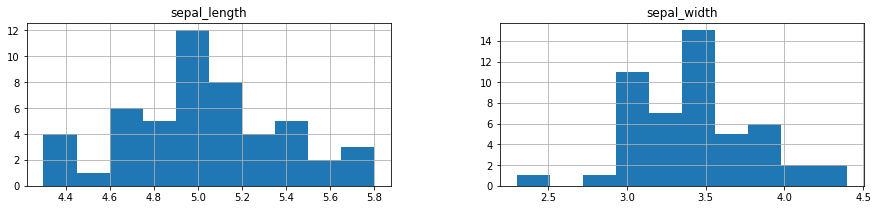

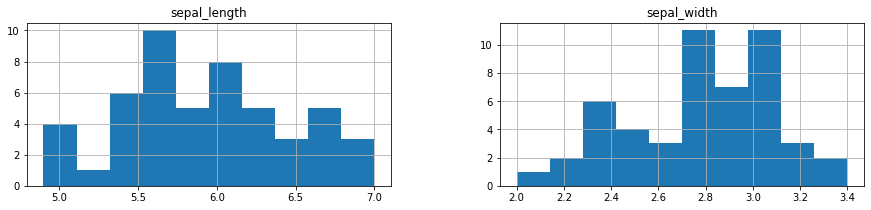

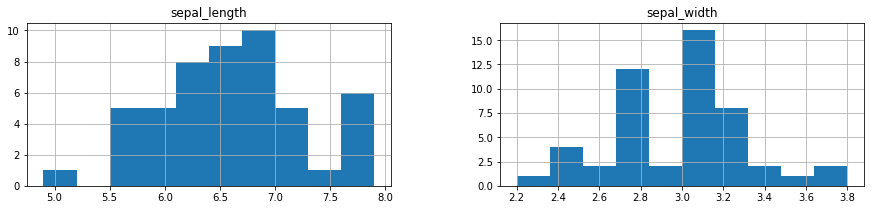

In [12]:
# Check feature distribution of each class to get an overview of feature and class relationshhip, and validating data
print(data.groupby('species').count())

data.groupby('species').hist(figsize=(15,3))
plt.show()

<a id='build-model'></a>
## II. Building the Logistic Regression Model

### i. Split into Training, Validation, and Test Set

Our Hypothesis : Species of Iris is dependent on sepal length and width of the flower. 
In order to check the validity of our trained model, we keep a part of our dataset hidden from the model during training, called  __Test data__.

Test data labels are predicted using the trained model and compared with the actual labels of the data.This gives us the idea about how well the model can be trusted for its predictive power.

* __Training set__ : The sample of data used to fit your model.

* __Test set__ : The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. 

* __Validation set__: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters

![image.png](assets/splitting-data.PNG)

In [13]:
from sklearn.model_selection import train_test_split

# Split data into training and test set using sklearn function
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

print ('Number of samples in training data:', len(x_train))
print ('Number of samples in test data:', len(x_test))

Number of samples in training data: 120
Number of samples in test data: 30


### ii. Training a Logistic Regression Model with Scikit-Learn

You can specify the type of multiclass logistic regression model by the `multi_class` parameter in `linear_model.LogisticRegression(...)`
- One-vs-Rest (One-vs-All): `multi_class = 'ovr'`
- Softmax Regression (Multinomial): `multi_class = 'multinomial'`
    
Further Reading: http://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit

In [14]:
from sklearn import linear_model

# Name our logistic regression object
LogisticRegressionModel = linear_model.LogisticRegression(solver = 'newton-cg', multi_class='multinomial')

# we create an instance of logistic Regression Classifier and fit the data.
LogisticRegressionModel.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

### iii. Training Accuracy

In [15]:
# TRAINING ACCURACY
training_accuracy=LogisticRegressionModel.score(x_train,y_train)

print ('Training Accuracy:',training_accuracy)

Training Accuracy: 0.8083333333333333


In [16]:
# Let's see how accuracy is calculated

# Predict a category for every row in x_train
predicted_label = LogisticRegressionModel.predict(x_train)    

def find_error(actual_label,predicted_label):
    '''Print the error rate given a series or array of `actual_labels` and `predicted_labels`. '''
    
    # Create an empty array to store loss values
    Loss_Array = np.zeros(len(actual_label)) 
    
    # Loop through predictions  and count number of incorrect labels.
    print ("Y-actualLabel   Z-predictedLabel   Error \n")
    
    for i,value in enumerate(actual_label):
        if value == predicted_label[i]: 
            Loss_Array[i] = 0
        else:
            Loss_Array[i] = 1
        print (value,"\t\t" ,predicted_label[i],"\t\t",Loss_Array[i])
    
    # Print average error and accuracy.
    error_rate=np.average(Loss_Array)
    print ("\nThe error rate is ", error_rate)
    print ('\nThe accuracy of the model is ',1-error_rate )   
    
find_error(y_train,predicted_label)

Y-actualLabel   Z-predictedLabel   Error 

0 		 0 		 0.0
0 		 0 		 0.0
1 		 1 		 0.0
2 		 2 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
1 		 0 		 1.0
1 		 0 		 1.0
0 		 1 		 1.0
0 		 0 		 0.0
1 		 1 		 0.0
1 		 0 		 1.0
2 		 2 		 0.0
1 		 1 		 0.0
0 		 1 		 1.0
2 		 2 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
2 		 2 		 0.0
2 		 2 		 0.0
2 		 2 		 0.0
0 		 1 		 1.0
1 		 0 		 1.0
1 		 1 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
1 		 0 		 1.0
0 		 0 		 0.0
1 		 1 		 0.0
1 		 0 		 1.0
2 		 2 		 0.0
2 		 2 		 0.0
0 		 1 		 1.0
2 		 2 		 0.0
2 		 2 		 0.0
1 		 0 		 1.0
0 		 1 		 1.0
2 		 2 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
1 		 1 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
1 		 1 		 0.0
1 		 0 		 1.0
0 		 0 		 0.0
1 		 1 		 0.0
0 		 0 		 0.0
0 		 1 		 1.0
1 		 1 		 0.0
1 		 1 		 0.0
0 		 1 		 1.0
0 		 0 		 0.0
2 		 2 		 0.0
2 		 2 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
1 		 

<a id='measure-performance'></a>
## III. Measuring Performance with a Confusion Matrix

In [17]:
# Find the TEST ACCURACY - model accuracy on data not used in to build the model
test_accuracy = LogisticRegressionModel.score(x_test,y_test)

print('Accuracy of the model on unseen test data: ', test_accuracy)

Accuracy of the model on unseen test data:  0.8666666666666667


> **Accuracy can be misleading.** Accuracy measures how many samples the model was able to predict correctly. We also should look at incorrect predictions.

### i. Accuracy, Precision, Recall

To formally define this error, we classify predications as:
- **True Positive** - predicted positive correctly
- **True Negative** - predicted negative correctly
- **False Positive** - predicted positive, actually negative (wrong)
- **False Negative** - predicted negative, actually positive (wrong)

**Accuracy** measures the number correctly classified positive and negative observations out of all observations in the dataset.

 $$ Accuracy = \frac{True \space Positive + True \space Negative } {All \space Observations} $$


**Precision** measures the the number of correctly classified positive observations out of all observations that were *predicted* positive.

 $$ Precision = \frac{True \space Positive} {True  \space Positives + False \space Positives} $$
 
 **Recall** measures the number correctly classified positive observations out of all observations that are *actually* positive.

 $$ Recall = \frac{True \space Positive} {True  \space Positives + False \space Negatives} $$

In [18]:
from sklearn import metrics

y_pred = LogisticRegressionModel.predict(x_test)

#Print classification report
print("Classification report for classifier %s:\n%s\n"
      % (LogisticRegressionModel, metrics.classification_report(y_test, y_pred)))

Classification report for classifier LogisticRegression(multi_class='multinomial', solver='newton-cg'):
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.75      0.90      0.82        10
           2       1.00      1.00      1.00         8

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.88      0.87      0.87        30




We can also calculate the precision and recall through the following methods:

In [19]:
from sklearn.metrics import precision_score, recall_score
print("Average precision for the 3 classes is - ", precision_score(y_test, y_pred, average = None) )
print("Average recall for the 3 classes is - ", recall_score(y_test, y_pred, average = None) )

Average precision for the 3 classes is -  [0.9  0.75 1.  ]
Average recall for the 3 classes is -  [0.75 0.9  1.  ]


### ii. Confusion matrix 

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

![image.png](assets/confusion-matrix.PNG)

In [20]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = LogisticRegressionModel.predict(x_test)
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_true, y_pred),columns=['Predicted 0','Predicted 1','Predicted 2'],index=['Actual 0','Actual 1','Actual 2'])
print ('Confusion matrix of test data is: \n',ConfusionMatrix)

Confusion matrix of test data is: 
           Predicted 0  Predicted 1  Predicted 2
Actual 0            9            3            0
Actual 1            1            9            0
Actual 2            0            0            8


Here's another way to create a confusion matrix.

Confusion matrix:
[[9 3 0]
 [1 9 0]
 [0 0 8]]


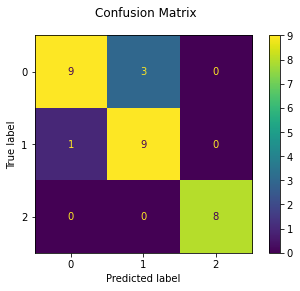

In [21]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

#Print classification report
disp = metrics.plot_confusion_matrix(LogisticRegressionModel, x_test,y_test)
disp.figure_.suptitle("Confusion Matrix");
print("Confusion matrix:\n%s" % disp.confusion_matrix)

<a id='visualizing-results'></a>
## IV.  Visualizing the Results

### i. Plot decision boundaries

In [22]:
# PLOT THE DECISION BOUNDARIES:
# 1.create meshgrid of all points between 

'''
For that we will create a mesh between [x_min, x_max]x[y_min, y_max].
We will choose a 2d vector space ranging from values +- 0.5 from our 
min and max values of sepal_length and sepal_width.
Then we will divide that whole region in a grid of  0.02 units cell size.
'''

# Find the min and max sepal length and widths boundaries for the graph
h = 0.02  # step size in the mesh
x_min = X['sepal_length'].min() - .5
x_max = X['sepal_length'].max() + .5
y_min = X['sepal_width'].min() - .5
y_max = X['sepal_width'].max() + .5

sepal_length_range = np.arange(x_min, x_max, h)
sepal_width_range = np.arange(y_min, y_max, h)

# Create datapoints for the mesh
sepal_length_values, sepal_width_values = np.meshgrid(sepal_length_range, sepal_width_range)

# Predict species for the fictious data in meshgrid
predicted_species = LogisticRegressionModel.predict(np.c_[sepal_length_values.ravel(), sepal_width_values.ravel()])

print ('Finished predicting species')

Finished predicting species


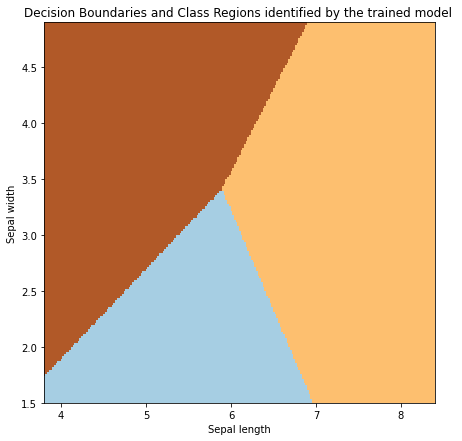

In [23]:
# Put the result into a color plot
def plot_decision_boundaries(ax):
    predicted_species_reshaped = predicted_species.reshape(sepal_length_values.shape)
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.pcolormesh(sepal_length_values,sepal_width_values,predicted_species_reshaped , cmap=plt.cm.Paired)
    ax.set_title('Decision Boundaries and Class Regions identified by the trained model ')
    #plt.colorbar()

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,7))
plot_decision_boundaries(ax)

### ii. Plot training actual and predicted labels

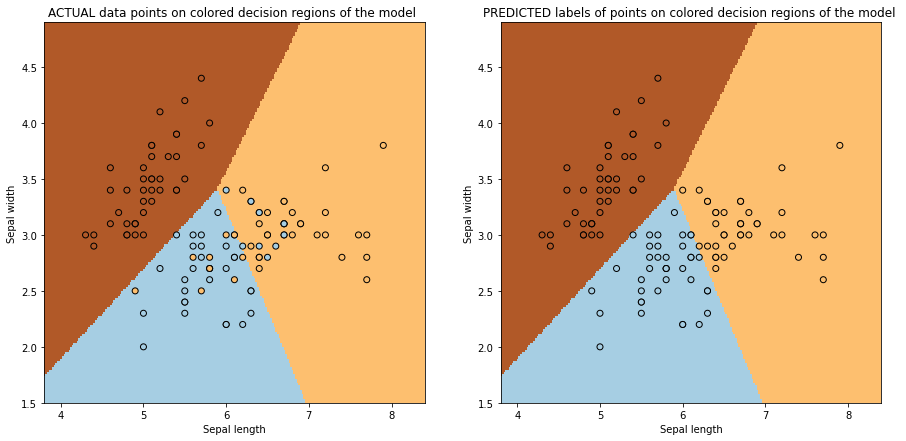

In [24]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

# Plot the training set actual labels
plot_decision_boundaries(ax[0])
ax[0].scatter(x_train['sepal_length'], x_train['sepal_width'], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
ax[0].set_title('ACTUAL data points on colored decision regions of the model ')

# Plot the training set predicted labels
plot_decision_boundaries(ax[1])
ax[1].scatter(x_train['sepal_length'], x_train['sepal_width'], c=predicted_label, edgecolors='k', cmap=plt.cm.Paired)
ax[1].set_title('PREDICTED labels of points on colored decision regions of the model ');

### iii. Plot test actual and predicted labels

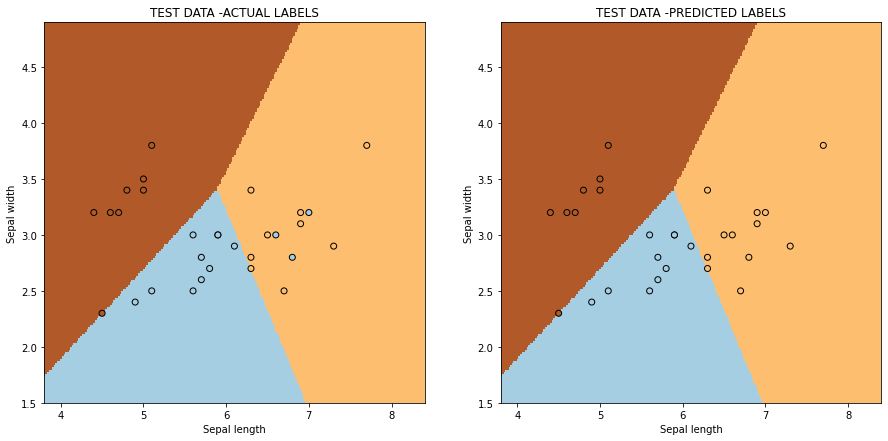

In [25]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

# Plot the training set actual labels
plot_decision_boundaries(ax[0])
ax[0].scatter(x_test['sepal_length'], x_test['sepal_width'], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
ax[0].set_title('TEST DATA -ACTUAL LABELS')

# Plot the training set predicted labels
plot_decision_boundaries(ax[1])
ax[1].scatter(x_test['sepal_length'], x_test['sepal_width'], c=LogisticRegressionModel.predict(x_test), edgecolors='k', cmap=plt.cm.Paired)
ax[1].set_title('TEST DATA -PREDICTED LABELS');

<a id='scaling'></a>
## V. Scaling Data Features
Model performance can sometime be improved if the features are normalized.

### i. Min Max Scaler
Scaling the variables using  **`sklearn.preprocessing.MinMaxScaler`** makes all the values between [0, 1].
> `# Min Max Scaler
>  X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
>  X_scaled = X_std * (max - min) + min`
>   <br> where min, max = feature range

### ii. Standard Scaler
Scaling the variables using  **`sklearn.preprocessing.StandardScaler`** makes the values have a mean of 0 and standard deviation of 1.<br>
The standard score of a sample $x$ is calculated as: $$ z = \frac{x - \mu} {\sigma} $$ where $\mu$ is the mean of the column and $\sigma$ is the standard deviation.

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [27]:
# lets check if the mean is ~0 and the std dev is ~1.
pd.DataFrame(X_scaled).rename(columns = {0:'sepal_length', 1:'sepal_width'}).describe().loc[['mean','std'],:]

,sepal_length,sepal_width
mean,-4.141132e-16,-6.635433e-16
std,1.003350e+00,1.003350e+00


In [28]:
# Split into training and test datasets
x_train_s, x_test_s, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=100)

# Create a logistic regression object
LogisticRegressionModel_s = linear_model.LogisticRegression(solver = 'newton-cg', multi_class='multinomial')

# Fit the data
LogisticRegressionModel_s.fit(x_train_s, y_train)

# Calculate training accuracy
training_accuracy_s = LogisticRegressionModel_s.score(x_train_s,y_train)
print ('Training Accuracy:',training_accuracy_s)

# Calculate test accuracy
test_accuracy_s = LogisticRegressionModel_s.score(x_test_s,y_test)
print('Test Accuracy: ',test_accuracy_s)

Training Accuracy: 0.8083333333333333
Test Accuracy:  0.8333333333333334


**Note:** Scaling does not significantly improve the model in this case. Some models/datasets do vastly change when scaling is applied (ex: neural networks, datasets with vastly different ranges in different columns)